# Deutsch-Jozsa Algorithm

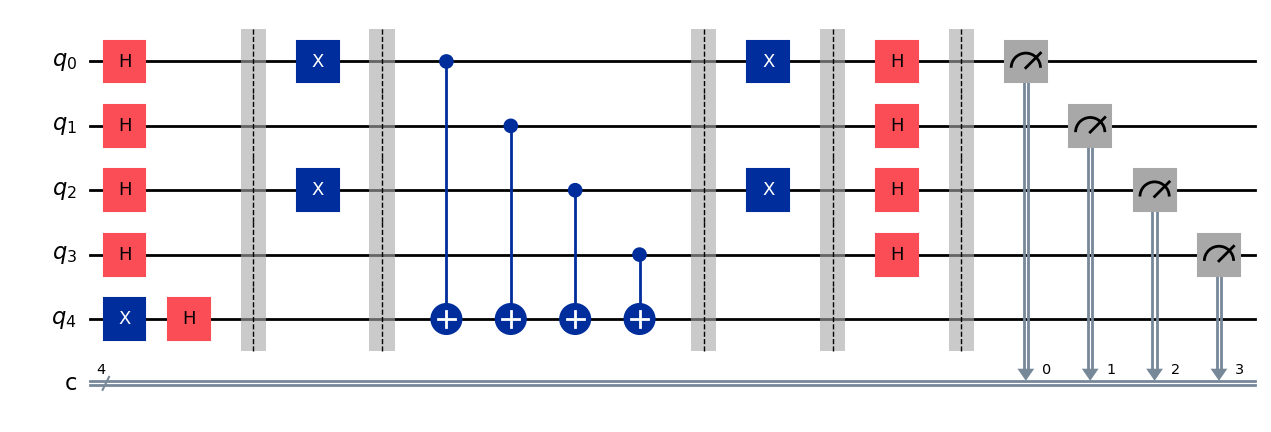

In [1]:
# It verifies if a given function is constant or balanced.

from qiskit import QuantumCircuit
def balanced_oracle(qc, n):
    qc.barrier()
    for x in range(0,n,2):
        qc.x(x)
    qc.barrier()
    for i in range(n):
        qc.cx(i, n) 
    qc.barrier()
    for x in range(0,n,2):
        qc.x(x) 
    qc.barrier() 
    return qc

def constant_oracle(qc, n):
    qc.barrier()
    qc.x(n)
    qc.barrier()
    return qc
n = 4 # Number of qubits


qc = QuantumCircuit(n+1, n)
qc.x(n)  # Set the ancilla qubit to |1>
## First hadamard gates
for i in range(n+1): 
    qc.h(i)
# Apply the oracle
# qc.compose(Oracle,inplace=True)  # Apply the oracle to the qubits as a circuit
qc = balanced_oracle(qc, n)
# qc = constant_oracle(qc, n)  # Use constant oracle for testing


# Apply the second set of Hadamard gates
for i in range(n): 
    qc.h(i)
qc.barrier()
for i in range(n):
    qc.measure(i, i)  # Measure the first n qubits


qc.draw("mpl")

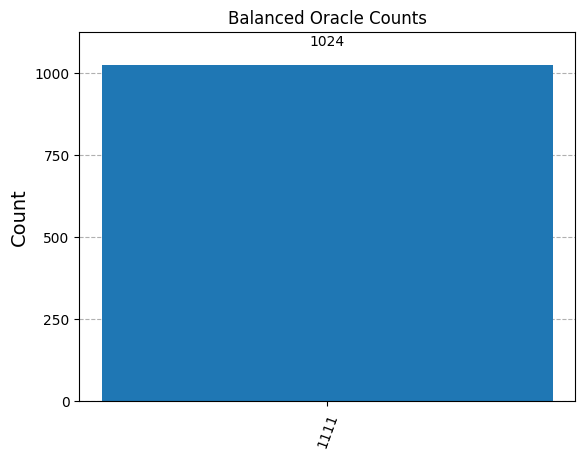

In [2]:
from qiskit_aer import AerSimulator
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(qc)
from qiskit.visualization import plot_histogram
plot_histogram(counts, title="Balanced Oracle Counts")

## Running on Actual QC

In [ ]:
sampler = SamplerV2(backend)
job = sampler.run([qc_transpiled])
print(f"job id: {job.job_id()}")
result = job.result()
print(f"result: {result}")

In [ ]:
job = service.job('d16t3p6v3z50008361k0')
job_result = job.result()

pub_result = job_result[0].data.meas.get_counts()
plot_histogram(pub_result, title="Inverse QFT Result Counts")

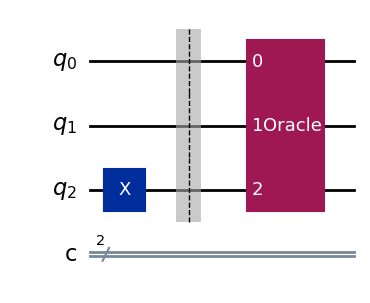

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.circuit.library import UnitaryGate
import numpy as np
def Oracle(qc,n):
    Oracle = QuantumCircuit(n+1)
    # Oracle.barrier()
    for x in range(0,n,2):
        Oracle.x(x)
    # Oracle.barrier()
    for i in range(n):
        Oracle.cx(i, n) 
    # Oracle.barrier()
    for x in range(0,n,2):
        Oracle.x(x) 
    # Oracle.barrier() 
    # display(Oracle.draw('mpl'))
    Oracle = Oracle.to_gate(label='Oracle')
    # qc.append(Oracle, [i for i in range(n+1)])
    return Oracle
### Using Balanced Oracle as a gate
n=2
qc = QuantumCircuit(n+1,n)
qc.x(n)
qc.barrier()
# Oracle(qc, n)
qc.append(Oracle(qc, n), [i for i in range(n+1)])
qc.draw('mpl')


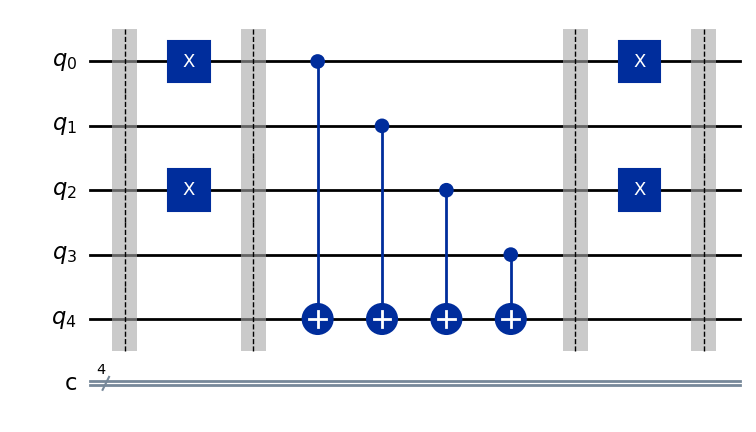

In [39]:
Oracle = QuantumCircuit(n+1,n)
Oracle.barrier()
for x in range(0,n,2):
    Oracle.x(x)
Oracle.barrier()
for i in range(n):
    Oracle.cx(i, n) 
Oracle.barrier()
for x in range(0,n,2):
    Oracle.x(x) 
Oracle.barrier() 
Oracle.draw('mpl')

# Quantum Fourier Transform

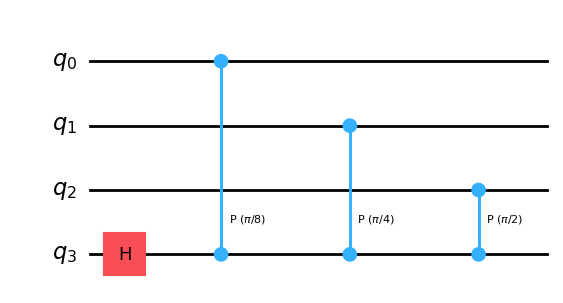

In [152]:

from qiskit import QuantumCircuit
from numpy import pi
def qft_rotations(circuit, n):
    if n == 0: # Exit function if circuit is empty
        return circuit
    n -= 1 # Indexes start from 0
    circuit.h(n) # Apply the H-gate to the most significant qubit
    for qubit in range(n):
        # For each less significant qubit, we need to do a smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

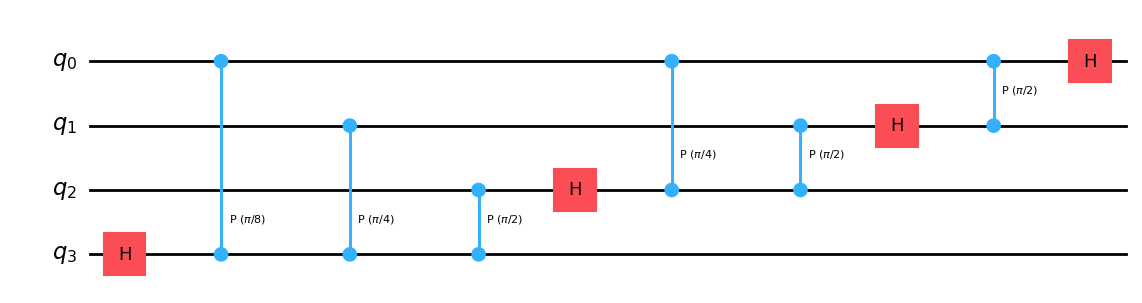

In [153]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on  the next qubits (we reduced n by one earlier in the function)
    # and we repeat the process until n reaches 0.
    qft_rotations(circuit, n)


qc = QuantumCircuit(4)
qft_rotations(qc,4)
qc.draw('mpl')

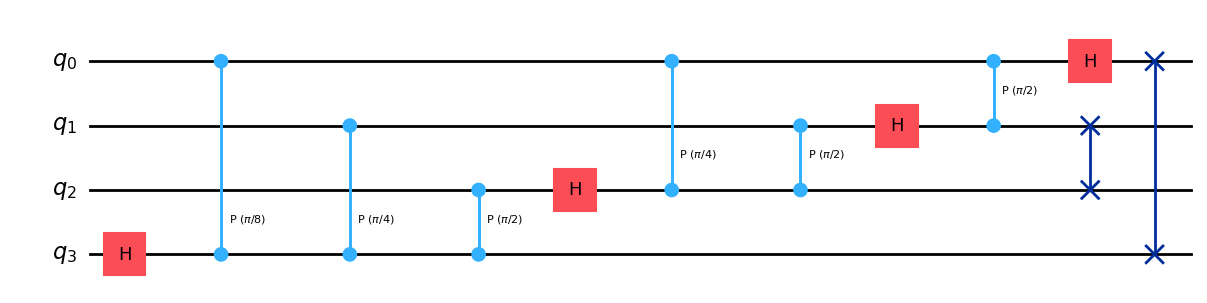

In [154]:
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n) # Perform the rotations on the first n qubits
    swap_registers(circuit, n) # Swap the qubits to put them in the correct order
    return circuit

qc = QuantumCircuit(4)
qft(qc,4)
qc.draw('mpl')

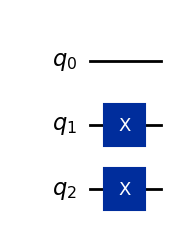

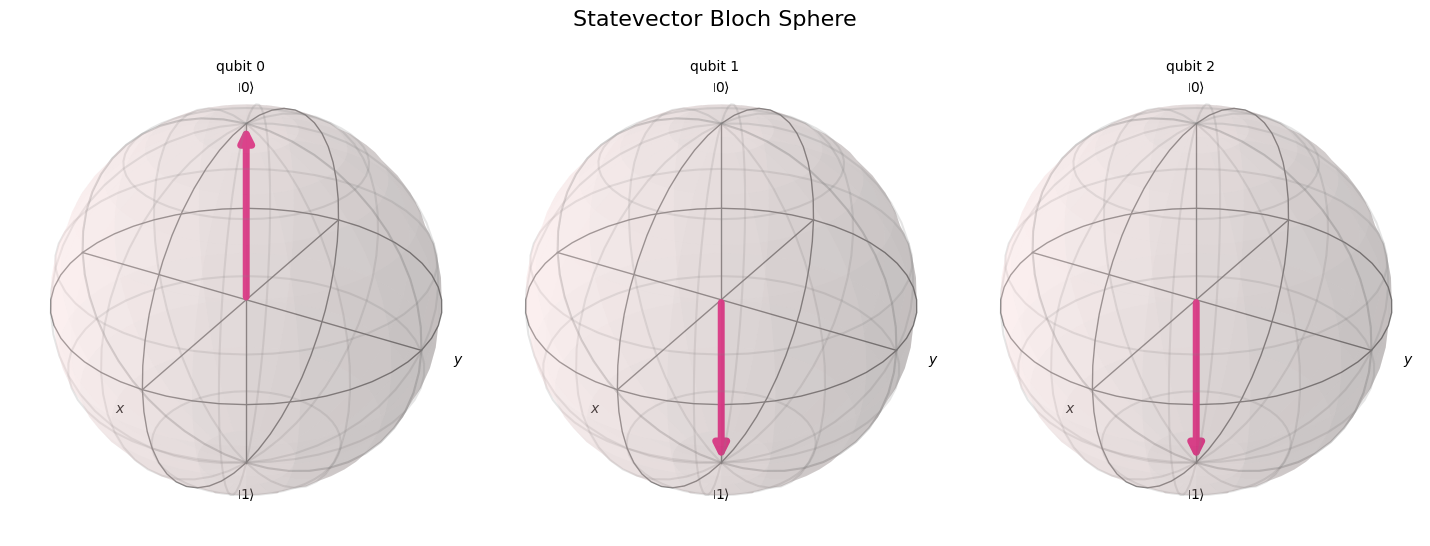

In [155]:
# Running the QFT circuit for 3 qubits say 110
qc = QuantumCircuit(3)
qc.x(1)  # Set the first qubit to |1>
qc.x(2)  # Set the second qubit to |1>
display(qc.draw('mpl'))
qc_copy = qc.copy()
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
qc_copy.save_statevector() 
simulator = AerSimulator()
result = simulator.run(qc_copy).result().get_statevector()
plot_bloch_multivector(result, title="Statevector Bloch Sphere")


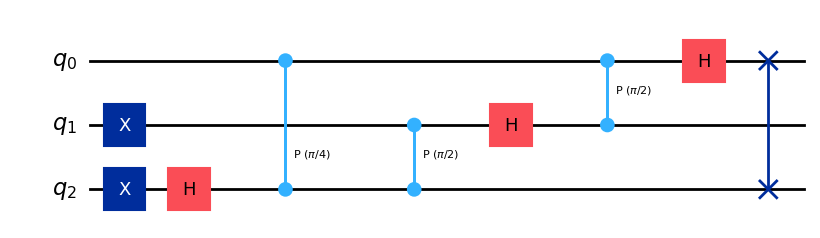

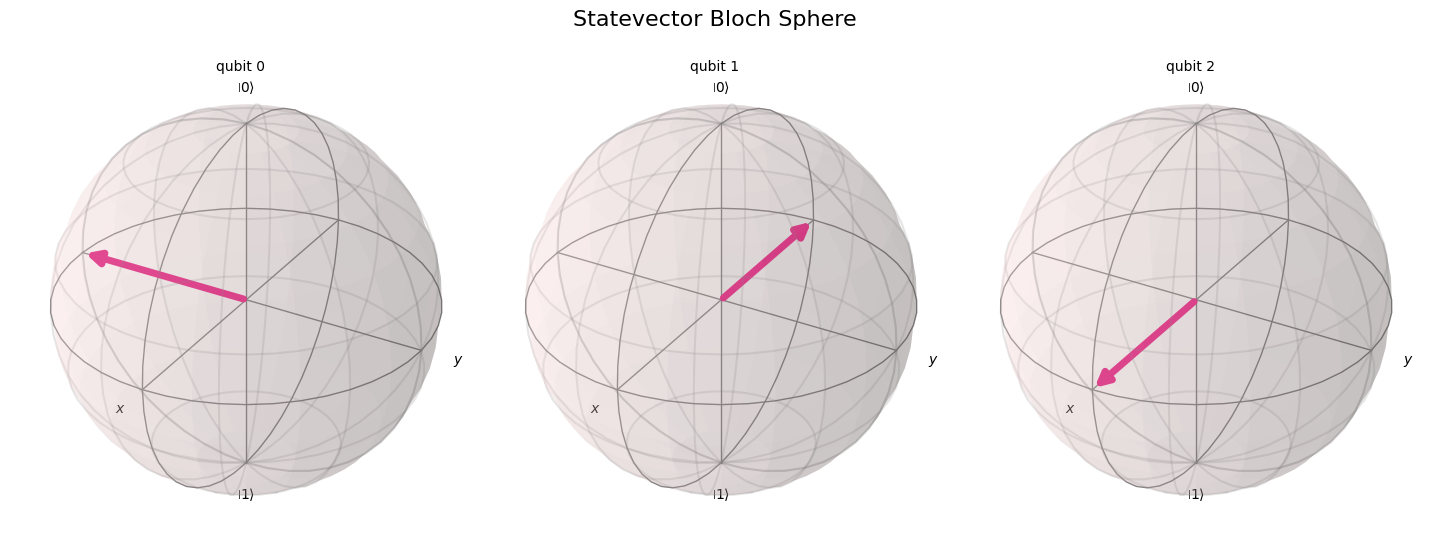

In [156]:
qft(qc, 3)  # Apply QFT to the circuit
display(qc.draw('mpl'))  # Draw the circuit

qc.save_statevector() 
simulator = AerSimulator()
result = simulator.run(qc).result().get_statevector()
plot_bloch_multivector(result, title="Statevector Bloch Sphere")

## The states are rotated after the QFT, so we can see the transformation on the Bloch sphere.

In [215]:
## Inverse QFT
def inverse_qft_circuit(circuit, n):
   qft_circuit = qft(QuantumCircuit(n,name='QFT'), n)  # Create a QFT circuit
   inverse_qft_circuit = qft_circuit.inverse()  # Get the inverse of the QFT circuit
   circuit.append(inverse_qft_circuit, range(n))  # Append the inverse QFT circuit to the original circuit
   return circuit.decompose()  # Decompose the circuit to show the individual gates



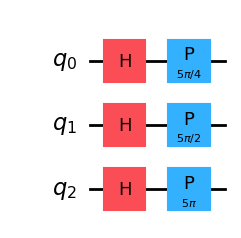

In [216]:
# Create fourier transform of the |5> state
nqubits = 3
number = 5
qc = QuantumCircuit(nqubits)
for qubit in range(nqubits):
    qc.h(qubit)
qc.p(number*pi/4,0)
qc.p(number*pi/2,1)
qc.p(number*pi,2)

qc.draw('mpl')

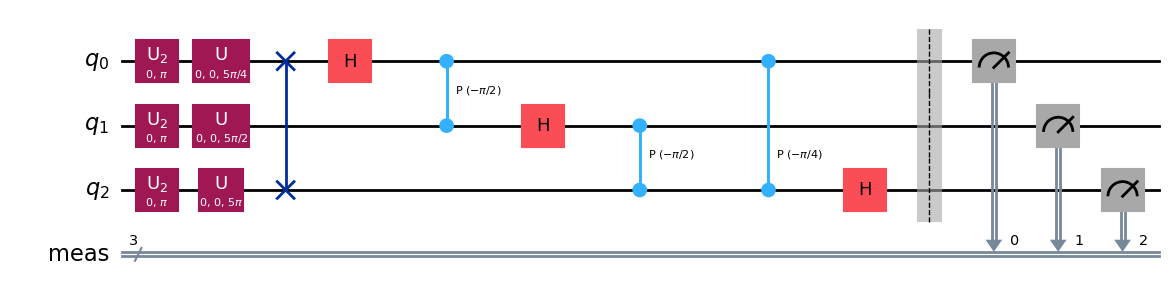

In [217]:
# Now we want to run it in a actual quantum computer and see if we get our state |5> back.

qc = inverse_qft_circuit(qc, nqubits)
qc.measure_all()
qc.draw('mpl')

## Running on actual Quantum Computer

In [186]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram


service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
print("least busy backend: ", backend)

qc_transpiled = generate_preset_pass_manager(optimization_level=3, backend=backend).run(qc)  # Transpile the circuit for the backend



C:\Users\KIIT\AppData\Local\Temp\ipykernel_6812\1846238980.py:6: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


least busy backend:  <IBMBackend('ibm_brisbane')>


In [169]:
sampler = SamplerV2(backend)
job = sampler.run([qc_transpiled])
print(f"job id: {job.job_id()}")
result = job.result()
print(f"result: {result}")

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:876: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


job id: d16t3p6v3z50008361k0
result: PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=3>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-06-14 16:22:52', stop='2025-06-14 16:22:54', size=4096>)])}, 'version': 2})


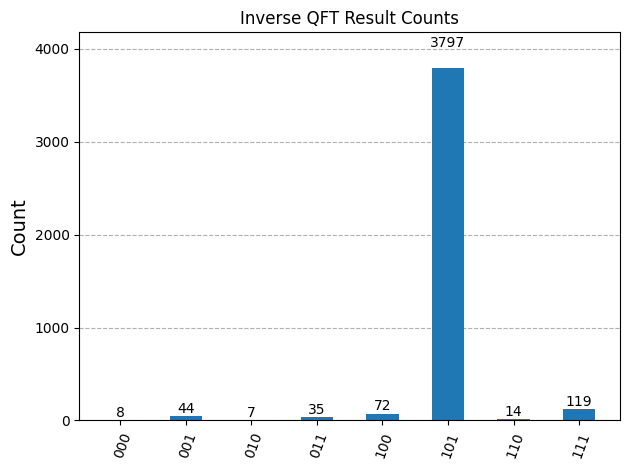

In [ ]:
job = service.job('d16t3p6v3z50008361k0')
job_result = job.result()

pub_result = job_result[0].data.meas.get_counts()
plot_histogram(pub_result, title="Inverse QFT Result Counts")

## The result should show the state |5> as the most frequent outcome, confirming that the inverse QFT successfully retrieved the original state. The
## other states will appear with lower probabilities, depending on the number of qubits and the specific state preparation.

{'101': 3797, '010': 7, '100': 72, '111': 119, '001': 44, '011': 35, '000': 8, '110': 14}


### Simulator without noise

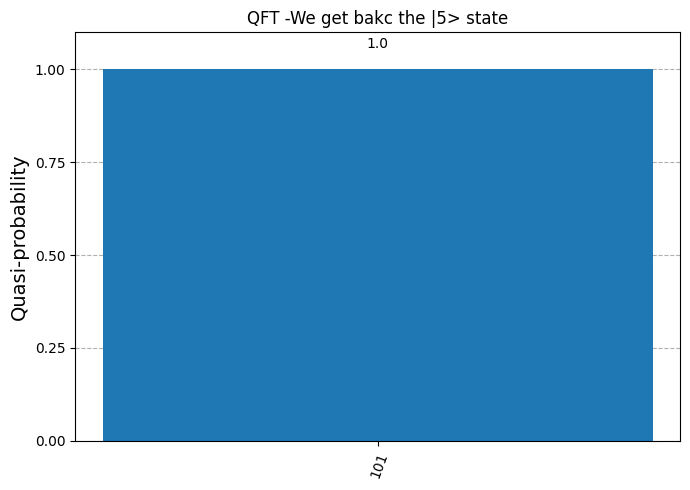

In [ ]:
from qiskit_aer import AerSimulator
simulator = AerSimulator()
result = simulator.run(qc).result()
counts = result.get_counts(qc)
from qiskit.visualization import plot_histogram #To plot the probability use plot_distribution
plot_histogram(counts, title="QFT -We get bakc the |5> state")

# Grover's Algorithm

### 1. Map the Problem

In [199]:
# Built-in modules
import math

# Imports from Qiskit
from qiskit import QuantumCircuit
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
from qiskit.visualization import plot_distribution

# Imports from Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [200]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

C:\Users\KIIT\AppData\Local\Temp\ipykernel_6812\3518575371.py:2: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum")


'ibm_brisbane'

In [201]:
def grover_oracle(marked_states):
    """Build a Grover oracle for multiple marked states

    Here we assume all input marked states have the same number of bits

    Parameters:
        marked_states (str or list): Marked states of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    if not isinstance(marked_states, list):
        marked_states = [marked_states]
    # Compute the number of qubits in circuit
    num_qubits = len(marked_states[0])

    qc = QuantumCircuit(num_qubits)
    # Mark each target state in the input list
    for target in marked_states:
        # Flip target bit-string to match Qiskit bit-ordering
        rev_target = target[::-1]
        # Find the indices of all the '0' elements in bit-string
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]
        # Add a multi-controlled Z-gate with pre- and post-applied X-gates (open-controls)
        # where the target bit-string has a '0' entry
        qc.x(zero_inds)
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)
        qc.x(zero_inds)
    return qc


C:\Users\KIIT\AppData\Local\Temp\ipykernel_6812\2302064698.py:27: DeprecationWarning: The class ``qiskit.circuit.library.generalized_gates.mcmt.MCMT`` is deprecated as of Qiskit 1.4. It will be removed no earlier than 3 months after the release date. Use MCMTGate instead.
  qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)


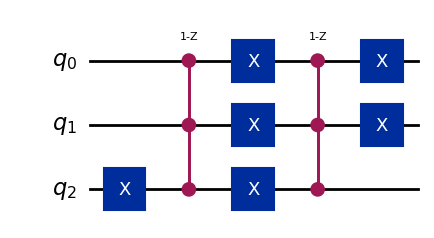

In [202]:
marked_states = ["011", "100"]

oracle = grover_oracle(marked_states)
oracle.draw(output="mpl", style="iqp")

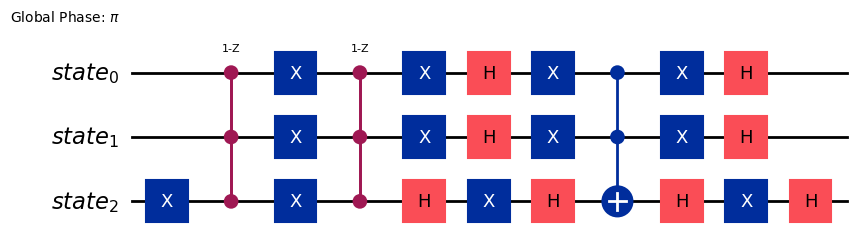

In [203]:
grover_op = GroverOperator(oracle)
grover_op.decompose().draw(output="mpl", style="iqp")

In [204]:
optimal_num_iterations = math.floor(
    math.pi / (4 * math.asin(math.sqrt(len(marked_states) / 2**grover_op.num_qubits)))
)

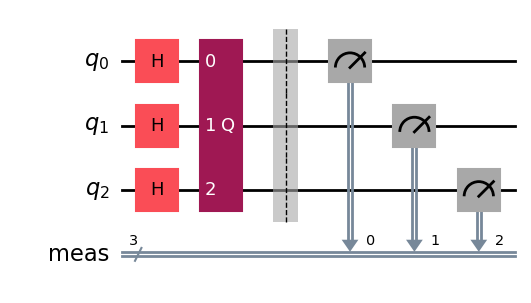

In [206]:
qc = QuantumCircuit(grover_op.num_qubits)
# Create even superposition of all basis states
qc.h(range(grover_op.num_qubits))
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(optimal_num_iterations), inplace=True)
# Measure all qubits
qc.measure_all()
qc.draw(output="mpl", style="iqp")

### 2. Optimize

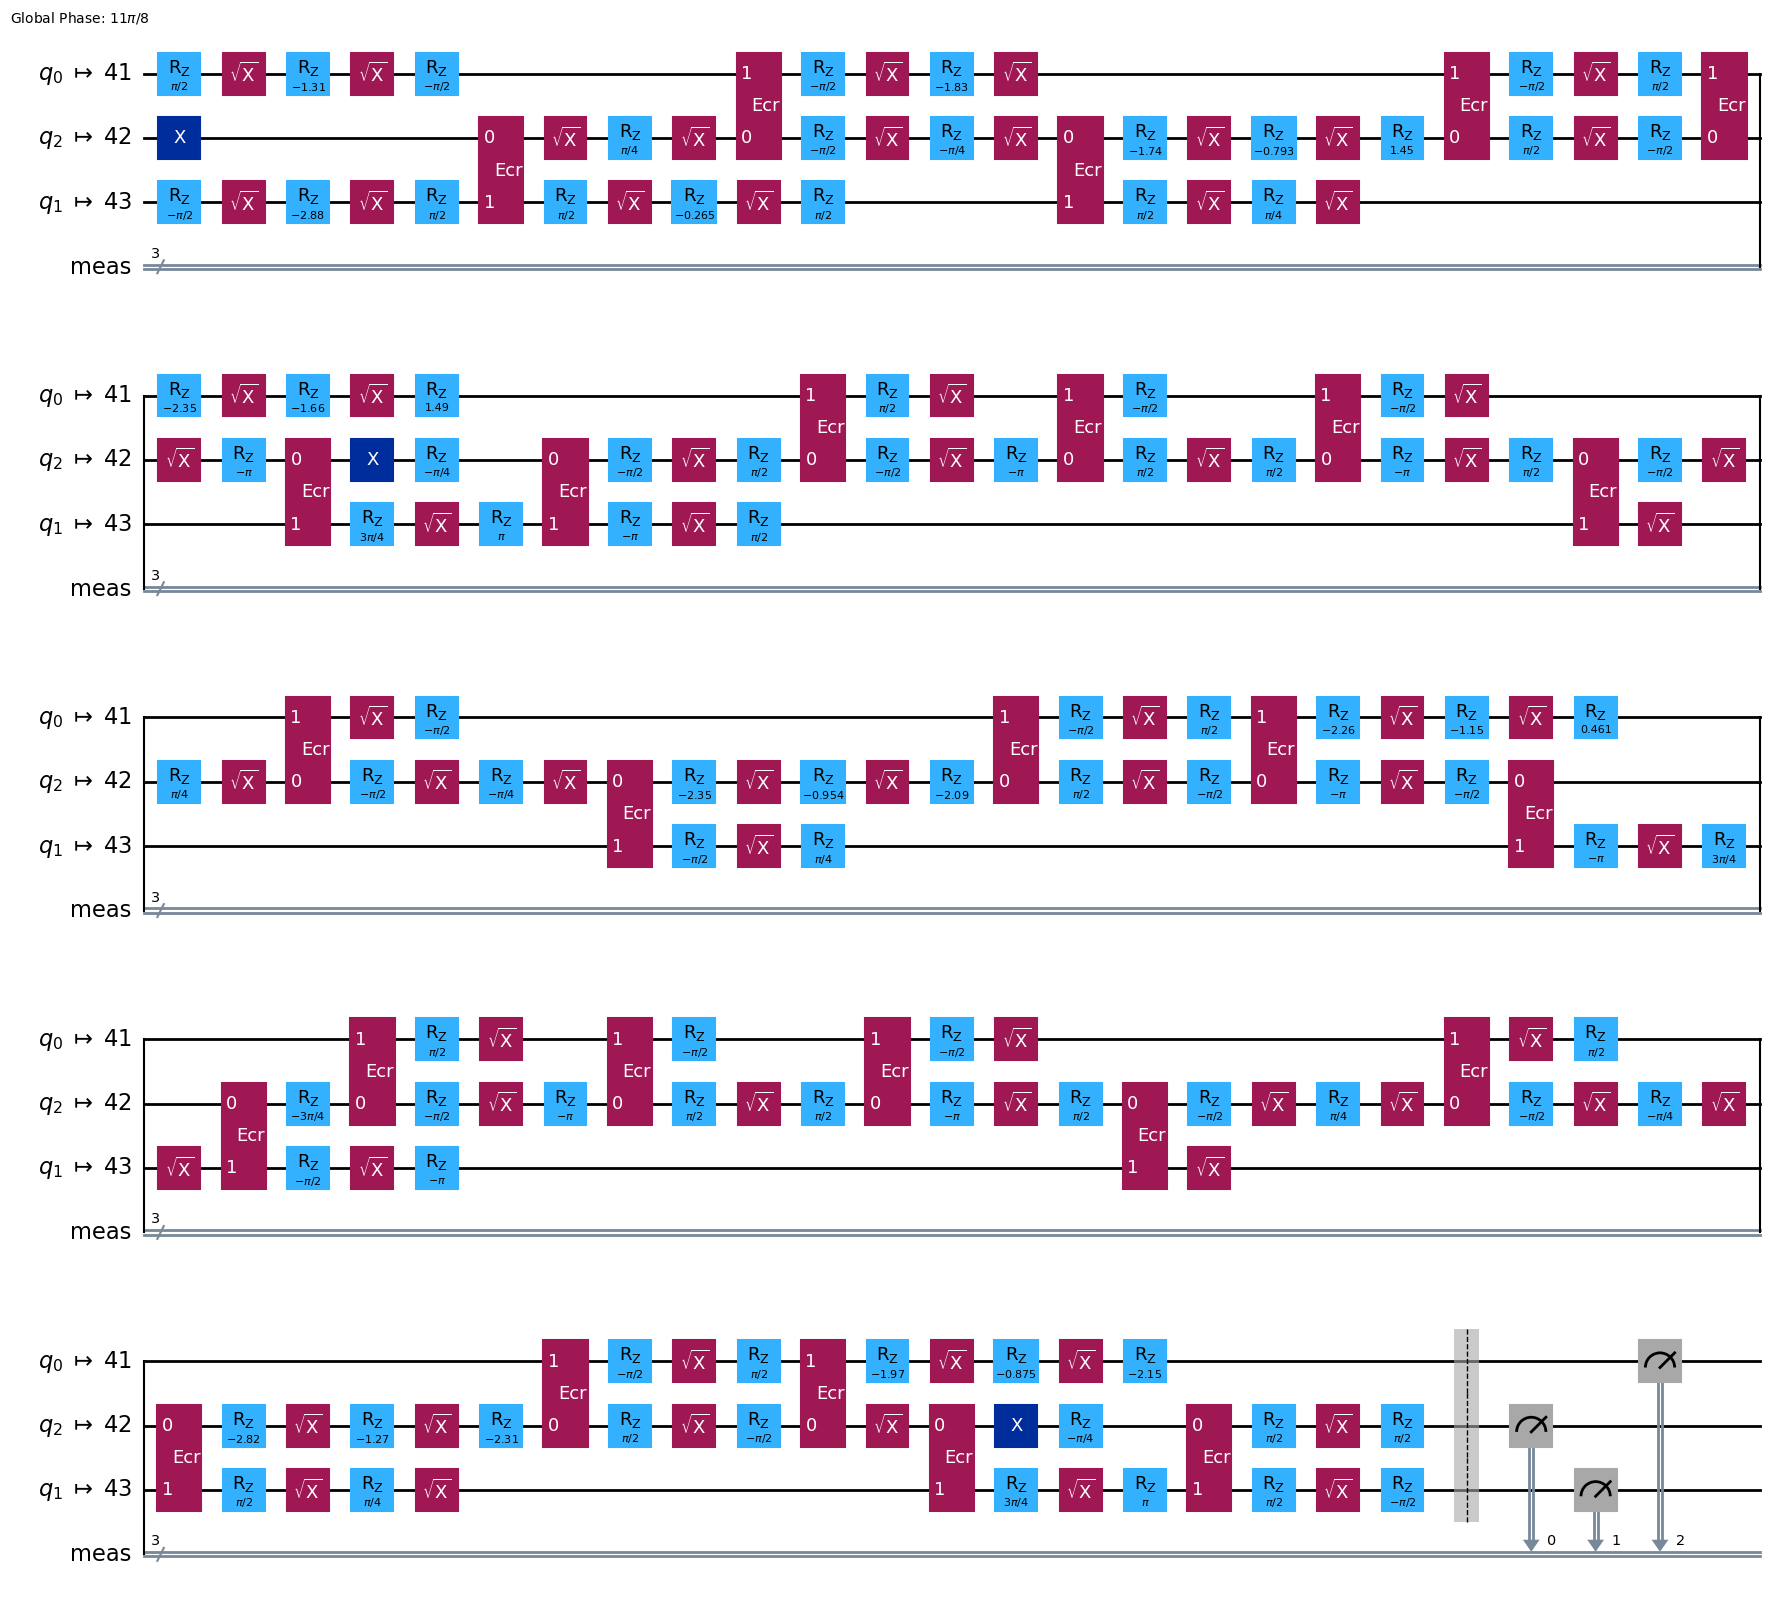

In [207]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

### 3. Execution

In [208]:
sampler = Sampler(mode=backend)
sampler.options.default_shots = 5000
result = sampler.run([circuit_isa]).result()
dist = result[0].data.meas.get_counts()

c:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:876: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


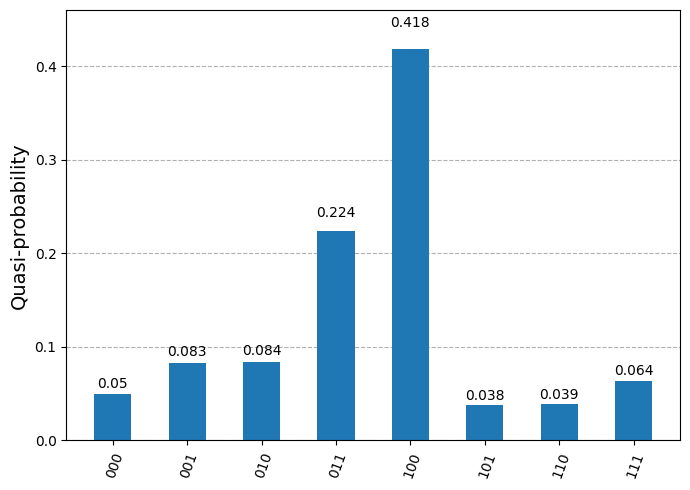

In [209]:
plot_distribution(dist)